<a href="https://colab.research.google.com/github/manishmaltare/Project---Machine-Learning-Insights-into-GDP-Drivers/blob/main/IDEA_IDEA_INDIA_FINAL_Regression_lasso_rigde_elasticnet_KNN___SVR__India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning only
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# DATA LOADING

In [ ]:
df=pd.read_excel('/content/india1.xlsx')

In [ ]:
df.head()

Year  Natural disasters       Exports       Imports  \
0  1980            1183188  1.143974e+10  1.722613e+10   
1  1981             837783  1.148570e+10  1.658461e+10   
2  1982            4563958  1.200942e+10  1.634353e+10   
3  1983            1808019  1.274134e+10  1.714005e+10   
4  1984             372505  1.333072e+10  1.639125e+10   

  political leadership change type of leadership         FDI  Population  \
0               Indira Gandhi         Democratic  79159999.9   687354025   
1               Indira Gandhi         Democratic  91920000.0   703696250   
2               Indira Gandhi         Democratic  72079999.9   720313473   
3               Indira Gandhi         Democratic   5639999.9   737372681   
4                Rajiv Gandhi         Democratic  19239999.9   754875449   

  Wars fought in year  Investment in Defence year wise           GDP  
0                  No                      11087705000  1.863286e+11  
1                  No                      11706276000  1.934914e+11  
2                  No                      12701485000  2.007156e+11  
3                  No                      13144250000  2.182621e+11  
4                  No                      13904538000  2.121576e+11

In [ ]:
df.shape

(45, 11)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             45 non-null     int64  
 1   Natural disasters                45 non-null     int64  
 2   Exports                          45 non-null     float64
 3   Imports                          45 non-null     float64
 4   political leadership change      45 non-null     object 
 5   type of leadership               45 non-null     object 
 6   FDI                              45 non-null     float64
 7   Population                       45 non-null     int64  
 8   Wars fought in year              45 non-null     object 
 9   Investment in Defence year wise  45 non-null     int64  
 10  GDP                              45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.0+ KB


In [ ]:
df.isnull().sum()

Year                               0
Natural disasters                  0
Exports                            0
Imports                            0
political leadership change        0
type of leadership                 0
FDI                                0
Population                         0
Wars fought in year                0
Investment in Defence year wise    0
GDP                                0
dtype: int64

In [ ]:
df.describe()

Year  Natural disasters       Exports       Imports  \
count    45.000000       4.500000e+01  4.500000e+01  4.500000e+01   
mean   2002.000000       4.731238e+06  2.285065e+11  2.620712e+11   
std      13.133926       6.755619e+06  2.509688e+11  2.854550e+11   
min    1980.000000       0.000000e+00  1.143974e+10  1.634353e+10   
25%    1991.000000       7.114610e+05  2.294340e+10  2.713207e+10   
50%    2002.000000       2.658254e+06  7.345290e+10  7.849876e+10   
75%    2013.000000       5.136550e+06  4.473844e+11  5.102447e+11   
max    2024.000000       3.111638e+07  8.286335e+11  9.192062e+11   

                FDI    Population  Investment in Defence year wise  \
count  4.500000e+01  4.500000e+01                     4.500000e+01   
mean   1.682569e+10  1.087030e+09                     3.999122e+10   
std    1.926322e+10  2.371413e+08                     2.297406e+10   
min    5.640000e+06  6.873540e+08                     1.108770e+10   
25%    2.521000e+08  8.839276e+08                     2.110819e+10   
50%    5.128094e+09  1.097600e+09                     3.211731e+10   
75%    3.457664e+10  1.295830e+09                     5.586206e+10   
max    6.436236e+10  1.450936e+09                     8.362314e+10   

                GDP  
count  4.500000e+01  
mean   1.172288e+12  
std    1.107472e+12  
min    1.863286e+11  
25%    2.960421e+11  
50%    5.149391e+11  
75%    1.856722e+12  
max    3.912686e+12

In [ ]:
df.set_index('Year', inplace=True)

In [ ]:
df.head(4)

Natural disasters       Exports       Imports  \
Year                                                  
1980            1183188  1.143974e+10  1.722613e+10   
1981             837783  1.148570e+10  1.658461e+10   
1982            4563958  1.200942e+10  1.634353e+10   
1983            1808019  1.274134e+10  1.714005e+10   

     political leadership change type of leadership         FDI  Population  \
Year                                                                          
1980               Indira Gandhi         Democratic  79159999.9   687354025   
1981               Indira Gandhi         Democratic  91920000.0   703696250   
1982               Indira Gandhi         Democratic  72079999.9   720313473   
1983               Indira Gandhi         Democratic   5639999.9   737372681   

     Wars fought in year  Investment in Defence year wise           GDP  
Year                                                                     
1980                  No                      11087705000  1.863286e+11  
1981                  No                      11706276000  1.934914e+11  
1982                  No                      12701485000  2.007156e+11  
1983                  No                      13144250000  2.182621e+11

In [ ]:
df.isnull().sum()

Natural disasters                  0
Exports                            0
Imports                            0
political leadership change        0
type of leadership                 0
FDI                                0
Population                         0
Wars fought in year                0
Investment in Defence year wise    0
GDP                                0
dtype: int64

In [ ]:
df.nunique()

Natural disasters                  44
Exports                            45
Imports                            45
political leadership change         9
type of leadership                  1
FDI                                45
Population                         45
Wars fought in year                 2
Investment in Defence year wise    45
GDP                                45
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

Natural disasters                  44
Exports                            45
Imports                            45
political leadership change         9
type of leadership                  1
FDI                                45
Population                         45
Wars fought in year                 2
Investment in Defence year wise    45
GDP                                45
dtype: int64

In [ ]:
df.columns

Index(['Natural disasters', 'Exports', 'Imports',
       'political leadership change', 'type of leadership', 'FDI',
       'Population', 'Wars fought in year', 'Investment in Defence year wise',
       'GDP'],
      dtype='object')

In [ ]:
df.rename(columns={'Natural disasters': 'Natural_disasters',
       'political leadership change' :'political_leadership_change' , 'type of leadership': 'type_of_government',
       'Wars fought in year' : 'Wars_fought_in_year', 'Investment in Defence year wise':'Investment_in_Defence_year_wise'}, inplace=True)

In [ ]:
df.head(3)

Natural_disasters       Exports       Imports  \
Year                                                  
1980            1183188  1.143974e+10  1.722613e+10   
1981             837783  1.148570e+10  1.658461e+10   
1982            4563958  1.200942e+10  1.634353e+10   

     political_leadership_change type_of_government         FDI  Population  \
Year                                                                          
1980               Indira Gandhi         Democratic  79159999.9   687354025   
1981               Indira Gandhi         Democratic  91920000.0   703696250   
1982               Indira Gandhi         Democratic  72079999.9   720313473   

     Wars_fought_in_year  Investment_in_Defence_year_wise           GDP  
Year                                                                     
1980                  No                      11087705000  1.863286e+11  
1981                  No                      11706276000  1.934914e+11  
1982                  No                      12701485000  2.007156e+11

In [ ]:
df.corr(numeric_only=True)

Natural_disasters   Exports   Imports  \
Natural_disasters                         1.000000  0.258557  0.235038   
Exports                                   0.258557  1.000000  0.997710   
Imports                                   0.235038  0.997710  1.000000   
FDI                                       0.434387  0.863458  0.864193   
Population                                0.333257  0.900010  0.897829   
Investment_in_Defence_year_wise           0.342828  0.967523  0.963459   
GDP                                       0.284453  0.991165  0.984220   

                                      FDI  Population  \
Natural_disasters                0.434387    0.333257   
Exports                          0.863458    0.900010   
Imports                          0.864193    0.897829   
FDI                              1.000000    0.867999   
Population                       0.867999    1.000000   
Investment_in_Defence_year_wise  0.910480    0.963265   
GDP                              0.868211    0.898853   

                                 Investment_in_Defence_year_wise       GDP  
Natural_disasters                                       0.342828  0.284453  
Exports                                                 0.967523  0.991165  
Imports                                                 0.963459  0.984220  
FDI                                                     0.910480  0.868211  
Population                                              0.963265  0.898853  
Investment_in_Defence_year_wise                         1.000000  0.974559  
GDP                                                     0.974559  1.000000

In [ ]:
import seaborn as sns

<Axes: >

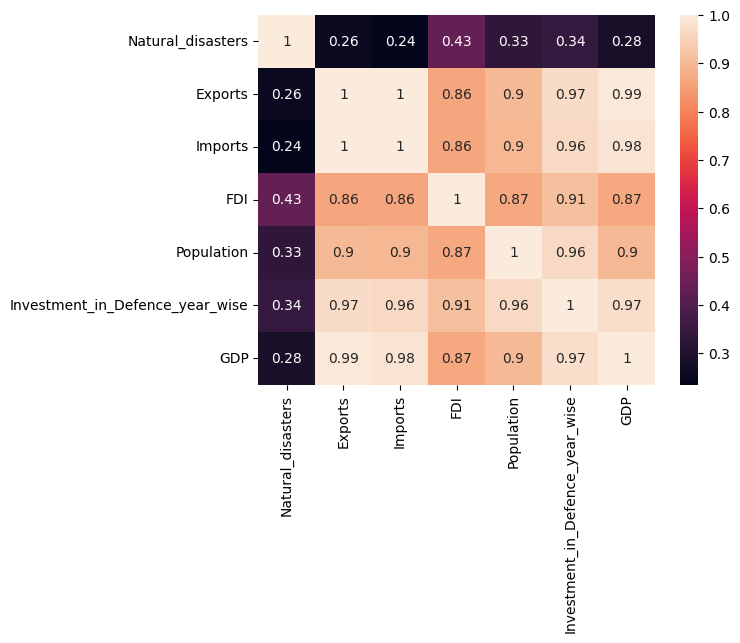

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
# This visualization shows that the variables are
# highly multicollinear, SO we can't use the MLR
# method here.

In [ ]:
df.columns

Index(['Natural_disasters', 'Exports', 'Imports',
       'political_leadership_change', 'type_of_government', 'FDI',
       'Population', 'Wars_fought_in_year', 'Investment_in_Defence_year_wise',
       'GDP'],
      dtype='object')

In [ ]:
i=df.columns
i

Index(['Natural_disasters', 'Exports', 'Imports',
       'political_leadership_change', 'type_of_government', 'FDI',
       'Population', 'Wars_fought_in_year', 'Investment_in_Defence_year_wise',
       'GDP'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def regplot(obj,l):
  i=obj.columns
  for i in obj:
    sns.regplot(x=obj[i], y=l)
    plt.tight_layout()
    plt.show()

In [ ]:
df.columns

Index(['Natural_disasters', 'Exports', 'Imports',
       'political_leadership_change', 'type_of_government', 'FDI',
       'Population', 'Wars_fought_in_year', 'Investment_in_Defence_year_wise',
       'GDP'],
      dtype='object')

In [ ]:
df.drop('type_of_government',axis=1,inplace = True)

In [ ]:
df.head(4)

Natural_disasters       Exports       Imports  \
Year                                                  
1980            1183188  1.143974e+10  1.722613e+10   
1981             837783  1.148570e+10  1.658461e+10   
1982            4563958  1.200942e+10  1.634353e+10   
1983            1808019  1.274134e+10  1.714005e+10   

     political_leadership_change         FDI  Population Wars_fought_in_year  \
Year                                                                           
1980               Indira Gandhi  79159999.9   687354025                  No   
1981               Indira Gandhi  91920000.0   703696250                  No   
1982               Indira Gandhi  72079999.9   720313473                  No   
1983               Indira Gandhi   5639999.9   737372681                  No   

      Investment_in_Defence_year_wise           GDP  
Year                                                 
1980                      11087705000  1.863286e+11  
1981                      11706276000  1.934914e+11  
1982                      12701485000  2.007156e+11  
1983                      13144250000  2.182621e+11

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.nunique()

Natural_disasters                                  44
Exports                                            45
Imports                                            45
FDI                                                45
Population                                         45
Investment_in_Defence_year_wise                    45
GDP                                                45
political_leadership_change_Chandra Shekhar         2
political_leadership_change_H. D. Deve Gowda        2
political_leadership_change_Inder Kumar Gujral      2
political_leadership_change_Indira Gandhi           2
political_leadership_change_Manmohan Singh          2
political_leadership_change_Narendra Modi           2
political_leadership_change_P. V. Narasimha Rao     2
political_leadership_change_Rajiv Gandhi            2
Wars_fought_in_year_Yes                             2
dtype: int64

In [ ]:
df.head(2)

Natural_disasters       Exports       Imports         FDI  Population  \
Year                                                                          
1980            1183188  1.143974e+10  1.722613e+10  79159999.9   687354025   
1981             837783  1.148570e+10  1.658461e+10  91920000.0   703696250   

      Investment_in_Defence_year_wise           GDP  \
Year                                                  
1980                      11087705000  1.863286e+11   
1981                      11706276000  1.934914e+11   

      political_leadership_change_Chandra Shekhar  \
Year                                                
1980                                        False   
1981                                        False   

      political_leadership_change_H. D. Deve Gowda  \
Year                                                 
1980                                         False   
1981                                         False   

      political_leadership_change_Inder Kumar Gujral  \
Year                                                   
1980                                           False   
1981                                           False   

      political_leadership_change_Indira Gandhi  \
Year                                              
1980                                       True   
1981                                       True   

      political_leadership_change_Manmohan Singh  \
Year                                               
1980                                       False   
1981                                       False   

      political_leadership_change_Narendra Modi  \
Year                                              
1980                                      False   
1981                                      False   

      political_leadership_change_P. V. Narasimha Rao  \
Year                                                    
1980                                            False   
1981                                            False   

      political_leadership_change_Rajiv Gandhi  Wars_fought_in_year_Yes  
Year                                                                     
1980                                     False                    False  
1981                                     False                    False

In [ ]:
def boxplot(obj):
  i = obj.columns
  for i in obj:
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()

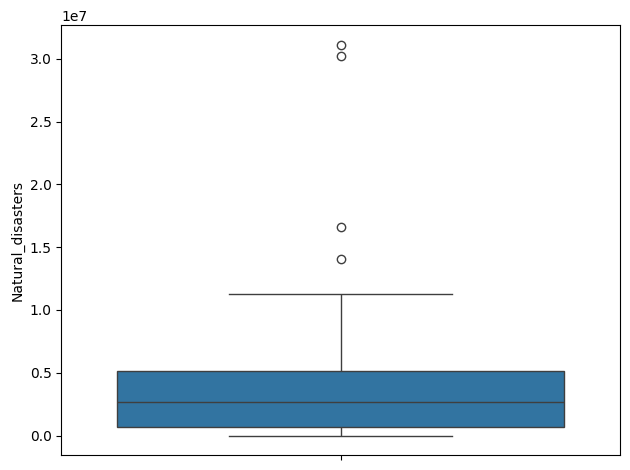

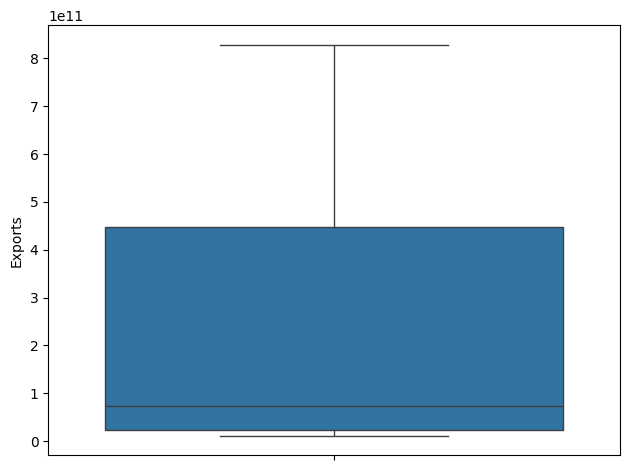

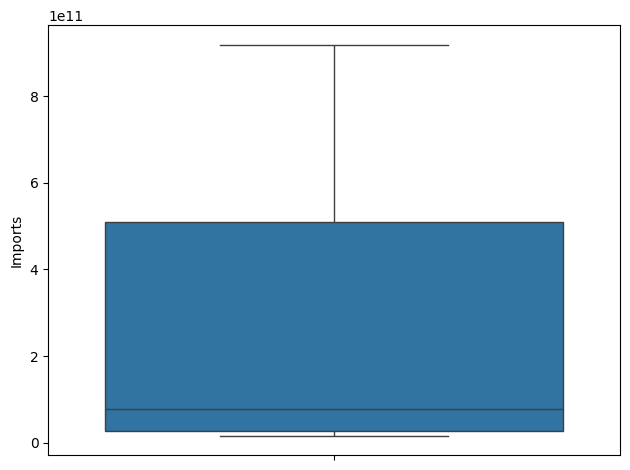

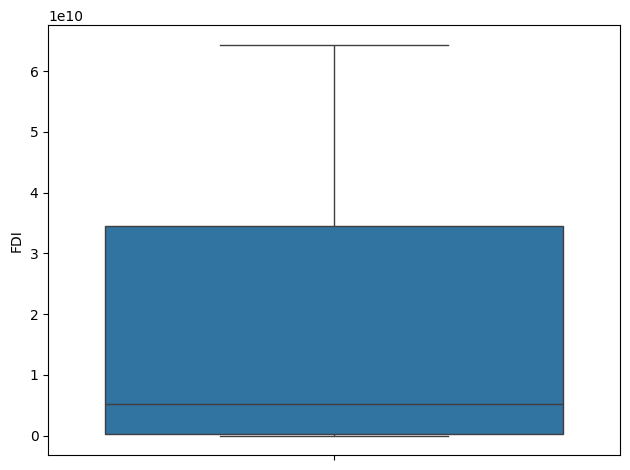

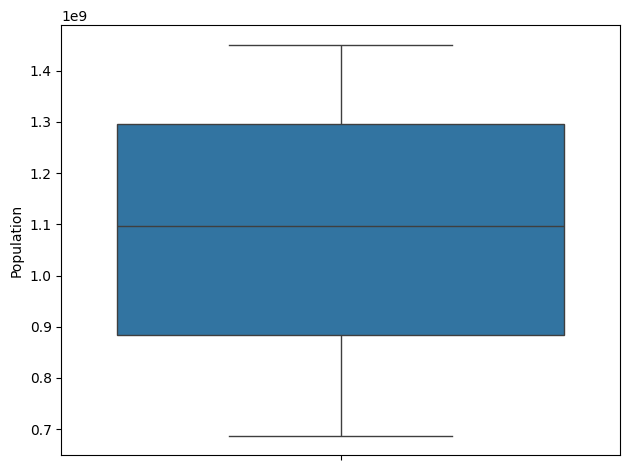

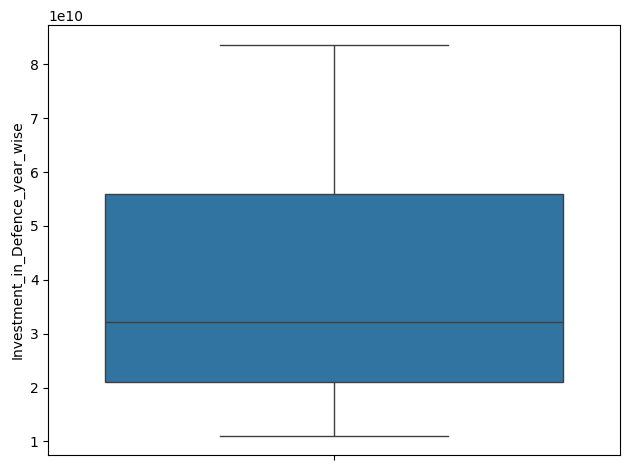

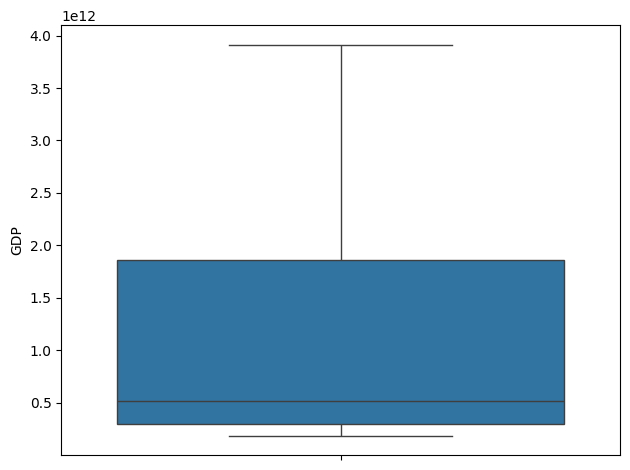

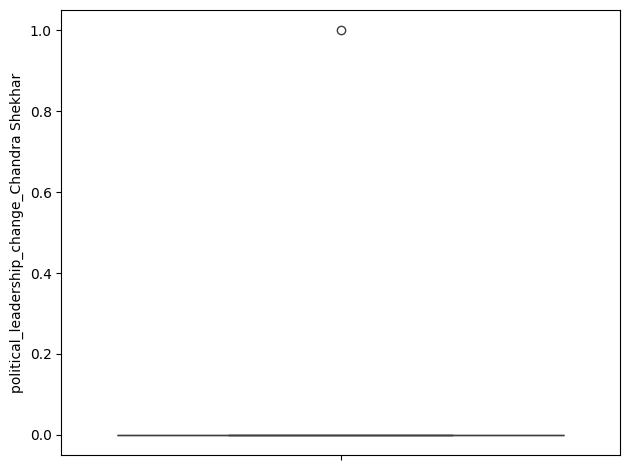

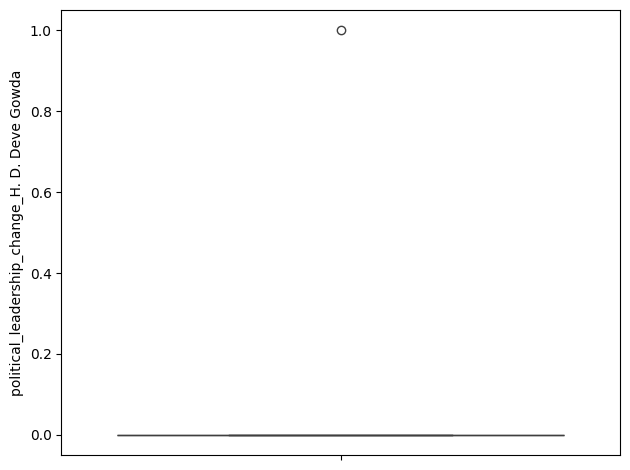

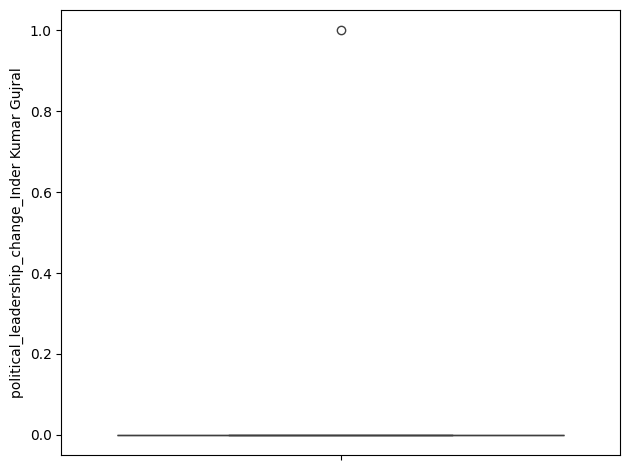

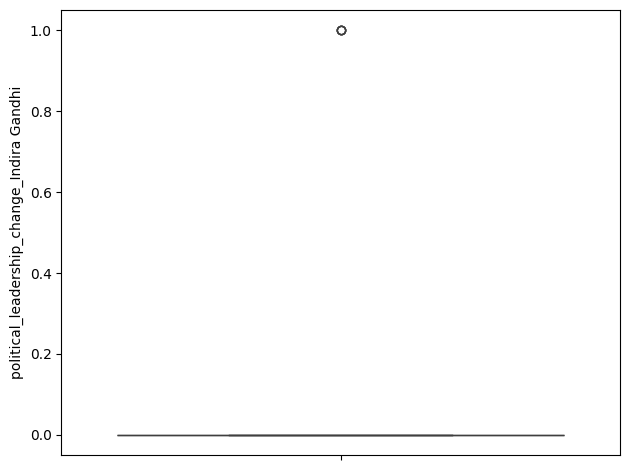

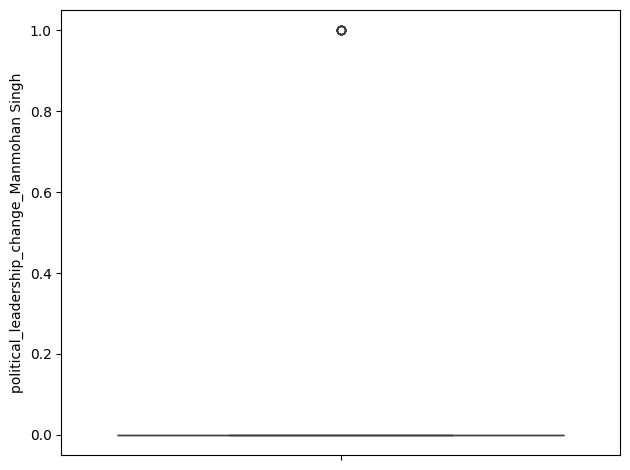

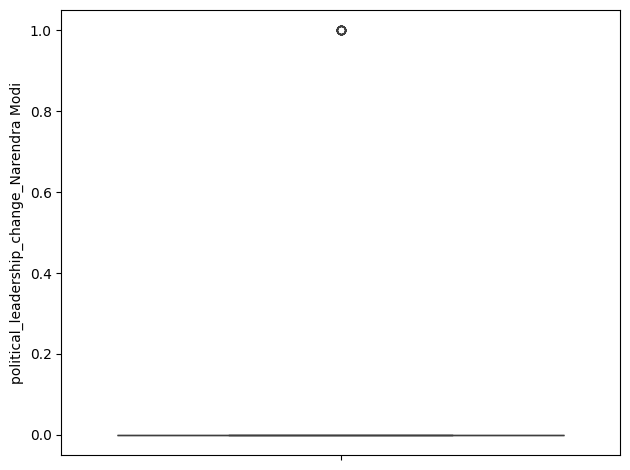

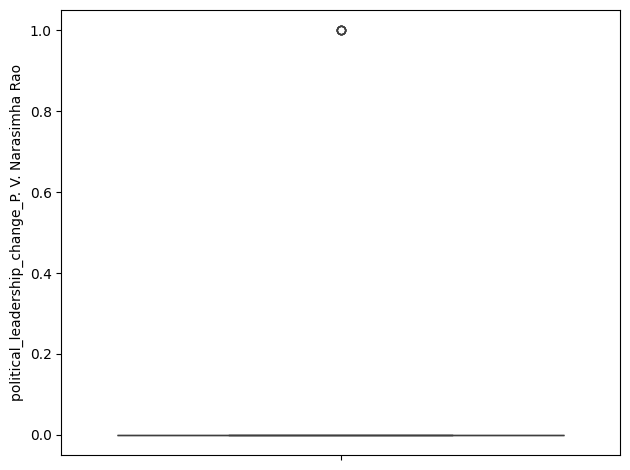

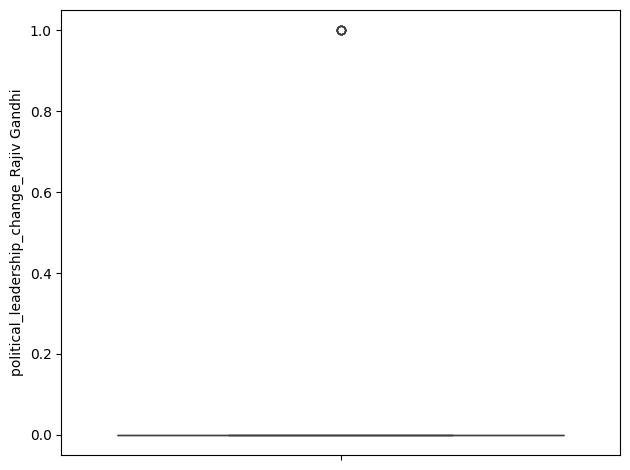

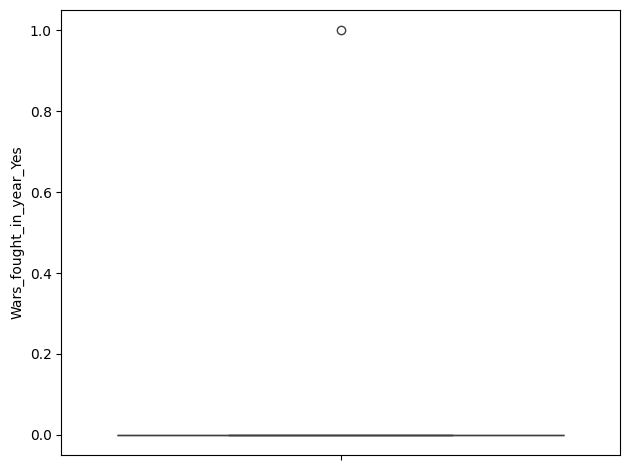

In [ ]:
boxplot(df)
# This visualization shows that only "Natural Disasters"
# have some outliers, most of the variables dont have outliers,
# the remaining are dummy variables.

In [ ]:
df.columns

Index(['Natural_disasters', 'Exports', 'Imports', 'FDI', 'Population',
       'Investment_in_Defence_year_wise', 'GDP',
       'political_leadership_change_Chandra Shekhar',
       'political_leadership_change_H. D. Deve Gowda',
       'political_leadership_change_Inder Kumar Gujral',
       'political_leadership_change_Indira Gandhi',
       'political_leadership_change_Manmohan Singh',
       'political_leadership_change_Narendra Modi',
       'political_leadership_change_P. V. Narasimha Rao',
       'political_leadership_change_Rajiv Gandhi', 'Wars_fought_in_year_Yes'],
      dtype='object')

In [ ]:
df_numerical = df[['Natural_disasters', 'Exports', 'Imports', 'FDI', 'Population',
       'Investment_in_Defence_year_wise', 'GDP',]]

In [ ]:
from scipy.stats import kurtosis, skew
import numpy as np
# This i did to know the distribution pattern of
# the numerical variables, basically to know if
# any variable is Normally distributed.

In [ ]:
for i in df_numerical.columns:
  mean=df_numerical[i].mean()
  median=df_numerical[i].median()
  stddev=df_numerical[i].std()
  q1=df_numerical[i].quantile(0.25)
  q3=df_numerical[i].quantile(0.75)
  ku=kurtosis(df[i])
  sk=skew(df[i])
  IQR=q3-q1
  print(i, f'  Central Tendency : mean = {mean:.1f}, median = {median:.1f}')
  print( f'           Dispersion : stddev = {stddev:.1f} & IQR = {IQR : .1f}')
  print( f'          Shape Stats : skew = {sk:.1f} & kurtosis = {ku : .1f}')
  if ku > 3:
    print('             Kurtosis : Heavy tails (leptokurtic — more outliers)')
  if ku < 3:
    print('             Kurtosis : Light tails (platykurtic — fewer outliers)')
  if sk < 0:
    print('                 Skew : Left-skewed (long left tail)')
  if sk > 0:
    print('                 Skew : Right-skewed (long right tail)')
  if (ku == 0) & (sk == 0):
    print('  Normal Distribution : Yes')
  if (ku != 0) & (sk != 0):
    print('  Normal Distribution : No')
  print()

Natural_disasters   Central Tendency : mean = 4731238.2, median = 2658254.0
           Dispersion : stddev = 6755619.3 & IQR =  4425089.0
          Shape Stats : skew = 2.7 & kurtosis =  7.5
             Kurtosis : Heavy tails (leptokurtic — more outliers)
                 Skew : Right-skewed (long right tail)
  Normal Distribution : No

Exports   Central Tendency : mean = 228506477390.3, median = 73452895951.6
           Dispersion : stddev = 250968803339.5 & IQR =  424441019551.8
          Shape Stats : skew = 0.9 & kurtosis = -0.4
             Kurtosis : Light tails (platykurtic — fewer outliers)
                 Skew : Right-skewed (long right tail)
  Normal Distribution : No

Imports   Central Tendency : mean = 262071247036.4, median = 78498759285.7
           Dispersion : stddev = 285454955043.8 & IQR =  483112675054.2
          Shape Stats : skew = 0.8 & kurtosis = -0.6
             Kurtosis : Light tails (platykurtic — fewer outliers)
                 Skew : Right-skewed (long 

In [ ]:
import seaborn as sns

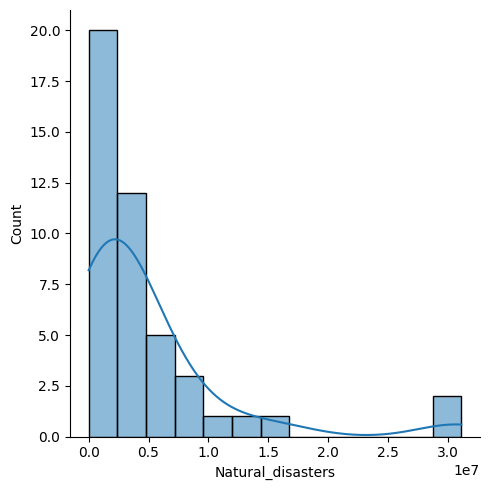

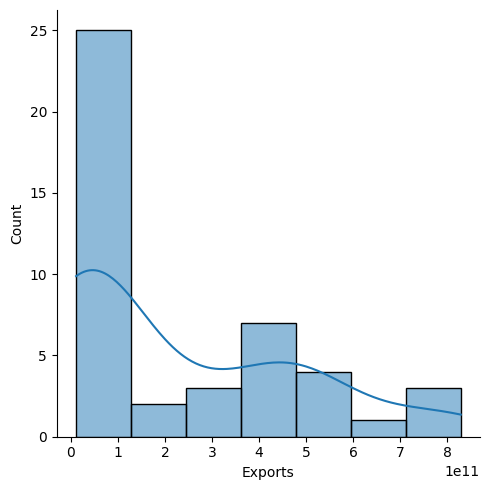

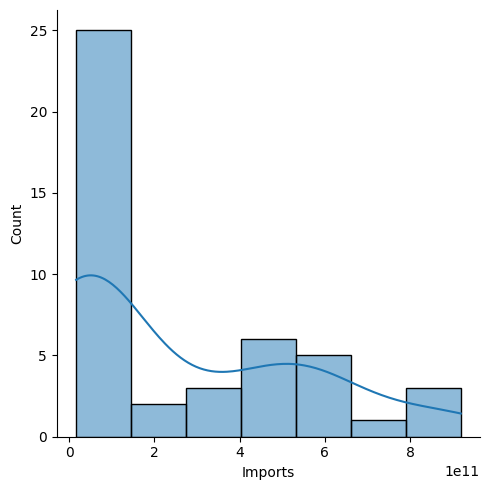

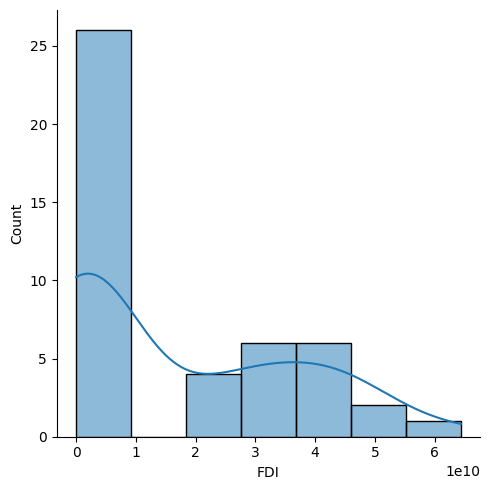

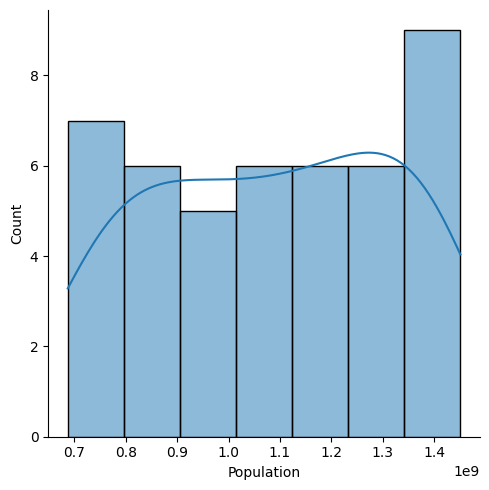

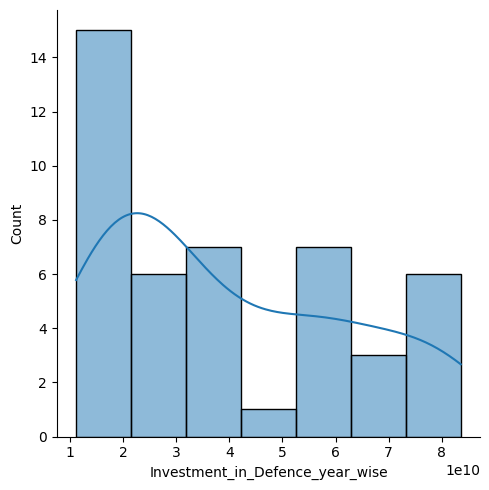

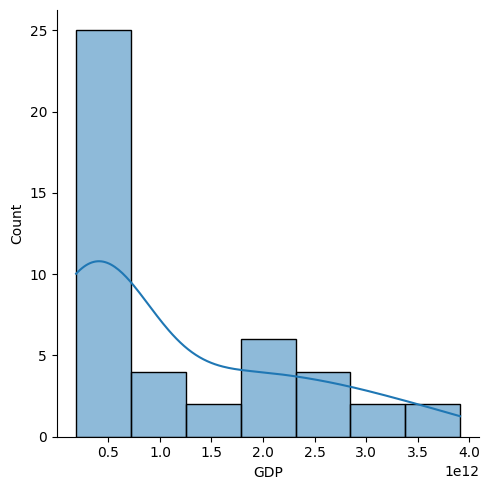

In [ ]:
for i in df_numerical.columns:
  sns.displot(df_numerical[i], kde=True)
  plt.tight_layout()
  plt.show()


In [ ]:
#  i will use standard scaler for 'population' because its  and robust scaler for
# all other numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df_numerical.columns

Index(['Natural_disasters', 'Exports', 'Imports', 'FDI', 'Population',
       'Investment_in_Defence_year_wise', 'GDP'],
      dtype='object')

In [ ]:
df['Population']=sc.fit_transform(df[['Population']])

In [ ]:
rs = RobustScaler()

In [ ]:
df[['Natural_disasters', 'Exports', 'Imports', 'FDI','Investment_in_Defence_year_wise', 'GDP']] = rs.fit_transform(df[['Natural_disasters', 'Exports', 'Imports', 'FDI','Investment_in_Defence_year_wise', 'GDP']])

In [ ]:
df.head(4)

Natural_disasters   Exports   Imports       FDI  Population  \
Year                                                                
1980          -0.333342 -0.146105 -0.126829 -0.147094   -1.704437   
1981          -0.411398 -0.145997 -0.128157 -0.146722   -1.634745   
1982           0.430659 -0.144763 -0.128656 -0.147300   -1.563880   
1983          -0.192140 -0.143039 -0.127007 -0.149236   -1.491131   

      Investment_in_Defence_year_wise       GDP  \
Year                                              
1980                        -0.605101 -0.210556   
1981                        -0.587303 -0.205967   
1982                        -0.558667 -0.201338   
1983                        -0.545927 -0.190095   

      political_leadership_change_Chandra Shekhar  \
Year                                                
1980                                        False   
1981                                        False   
1982                                        False   
1983                                        False   

      political_leadership_change_H. D. Deve Gowda  \
Year                                                 
1980                                         False   
1981                                         False   
1982                                         False   
1983                                         False   

      political_leadership_change_Inder Kumar Gujral  \
Year                                                   
1980                                           False   
1981                                           False   
1982                                           False   
1983                                           False   

      political_leadership_change_Indira Gandhi  \
Year                                              
1980                                       True   
1981                                       True   
1982                                       True   
1983                                       True   

      political_leadership_change_Manmohan Singh  \
Year                                               
1980                                       False   
1981                                       False   
1982                                       False   
1983                                       False   

      political_leadership_change_Narendra Modi  \
Year                                              
1980                                      False   
1981                                      False   
1982                                      False   
1983                                      False   

      political_leadership_change_P. V. Narasimha Rao  \
Year                                                    
1980                                            False   
1981                                            False   
1982                                            False   
1983                                            False   

      political_leadership_change_Rajiv Gandhi  Wars_fought_in_year_Yes  
Year                                                                     
1980                                     False                    False  
1981                                     False                    False  
1982                                     False                    False  
1983                                     False                    False

In [ ]:
x = df.drop(['GDP'],axis=1)

In [ ]:
y=df[['GDP']]

# EDA - 2 : MODEL SELECTION

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42 , test_size=0.3)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31, 15), (14, 15), (31, 1), (14, 1))

# ELASTIC NET

## Model building

### Training dataset

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [ ]:
en = ElasticNet()

In [ ]:
model_en_train = en.fit(x_train,y_train)

In [ ]:
model_en_train

ElasticNet()

In [ ]:
y_pred_en_train = model_en_train.predict(x_train)

In [ ]:
y_pred_en_train

array([0.37050621, 0.34948869, 0.48684073, 0.35990874, 0.32872674,
       0.36519685, 0.46889322, 0.44203097, 0.42277815, 0.28542142,
       0.4371888 , 0.43228838, 0.30869811, 0.33906641, 0.45147457,
       0.28988122, 0.4806171 , 0.39200115, 0.29441606, 0.45596314,
       0.40261818, 0.46460511, 0.33389348, 0.39737778, 0.37583631,
       0.49380312, 0.38654973, 0.31859989, 0.35468618, 0.42748703,
       0.47298718])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_en_train = mean_squared_error(y_train, y_pred_en_train)
rmse_en_train = mean_squared_error(y_train, y_pred_en_train)
mae_en_train = mean_absolute_error(y_train, y_pred_en_train)
r2_en_train = r2_score(y_train, y_pred_en_train)

print(f"Elastic Net Regression Training data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_en_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_en_train:.4f}")
print(f"R-squared (R²) Score: {r2_en_train:.4f}")

Elastic Net Regression Training data Evaluation:
Mean Squared Error (MSE): 0.3869
Root Mean Squared Error (RMSE): 0.3869
Mean Absolute Error (MAE): 0.5281
R-squared (R²) Score: 0.1569


### Testing Dataset

In [ ]:
model_en_test=en.fit(x_test,y_test)

In [ ]:
model_en_test

ElasticNet()

In [ ]:
y_pred_net_test = model_en_test.predict(x_test)

In [ ]:
y_pred_net_test

array([0.64611065, 0.51516233, 0.52533325, 0.67351198, 0.61202286,
       0.66017672, 0.29176842, 0.37451094, 0.3322606 , 0.28198852,
       0.31178025, 0.50472195, 0.58444791, 0.45009411])

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_en_test = mean_squared_error(y_test, y_pred_net_test)
rmse_en_test = mean_squared_error(y_test, y_pred_net_test)
mae_en_test = mean_absolute_error(y_test, y_pred_net_test)
r2_en_test = r2_score(y_test, y_pred_net_test)

print(f"Elastic Net Regression Testing data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_en_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_en_test:.4f}")
print(f"R-squared (R²) Score: {r2_en_test:.4f}")

Elastic Net Regression Testing data Evaluation:
Mean Squared Error (MSE): 0.3937
Root Mean Squared Error (RMSE): 0.3937
Mean Absolute Error (MAE): 0.5529
R-squared (R²) Score: 0.2981


## Hyperparameter Tuning

### Training dataset

In [ ]:
param_grid = {'alpha': [1e-5, 1e-3, 1e-1, 1, 10, 100],'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

In [ ]:
grid_en_train = GridSearchCV(ElasticNet(), param_grid=param_grid)

In [ ]:
grid_en_train.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.001, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]})

In [ ]:
grid_en_train.best_params_

{'alpha': 0.001, 'l1_ratio': 1}

In [ ]:
model_en_train_tuned = ElasticNet(alpha= 0.001, l1_ratio=1)

In [ ]:
model_en_train_tuned.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=1)

In [ ]:
y_pred_net_tuned_train = model_en_train_tuned.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
model_en_train_tuned.intercept_

array([0.03462334])

In [ ]:
feature_names = x.columns

In [ ]:
coef = model_en_train_tuned.coef_

### Testing dataset

In [ ]:
param_grid = {'alpha': [1e-5, 1e-3, 1e-1, 1, 10, 100],'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

In [ ]:
grid_en_test= GridSearchCV(ElasticNet(), param_grid=param_grid)

In [ ]:
grid_en_test.fit(x_test,y_test)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.001, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]})

In [ ]:
grid_en_test.best_params_

{'alpha': 0.001, 'l1_ratio': 1}

In [ ]:
model_en_test_tuned = ElasticNet(alpha= 0.001, l1_ratio=1)

In [ ]:
model_en_test_tuned.fit(x_test, y_test)

ElasticNet(alpha=0.001, l1_ratio=1)

In [ ]:
y_pred_net_tuned_test = model_en_test_tuned.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
model_en_test_tuned.intercept_
model_en_train_tuned.intercept_
feature_names = x.columns
coef_en_test_tuned = model_en_test_tuned.coef_
coef_en_train_tuned = model_en_train_tuned.coef_

## Evaluation - Tuned Dataset


In [ ]:
# Calculate evaluation metrics
mse_en_train_tuned= mean_squared_error(y_train, y_pred_net_tuned_train)
rmse_en_train_tuned = mean_squared_error(y_train, y_pred_net_tuned_train)
mae_en_train_tuned = mean_absolute_error(y_train, y_pred_net_tuned_train)
r2_en_train_tuned = r2_score(y_train, y_pred_net_tuned_train)

print(f"Elastic Net Regression Train-Tuned Evaluation:")
print(f"Mean Squared Error (MSE): {mse_en_train_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en_train_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_en_train_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_en_train_tuned:.4f}")

print()
print()
# Calculate evaluation metrics
mse_en_test_tuned = mean_squared_error(y_test, y_pred_net_tuned_test)
rmse_en_test_tuned = mean_squared_error(y_test, y_pred_net_tuned_test)
mae_en_test_tuned = mean_absolute_error(y_test, y_pred_net_tuned_test)
r2_en_test_tuned = r2_score(y_test, y_pred_net_tuned_test)

print(f"Elastic Net Regression Test-Tuned Evaluation:")
print(f"Mean Squared Error (MSE): {mse_en_test_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en_test_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_en_test_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_en_test_tuned:.4f}")

Elastic Net Regression Train-Tuned Evaluation:
Mean Squared Error (MSE): 0.0018
Root Mean Squared Error (RMSE): 0.0018
Mean Absolute Error (MAE): 0.0309
R-squared (R²) Score: 0.9960


Elastic Net Regression Test-Tuned Evaluation:
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0004
Mean Absolute Error (MAE): 0.0176
R-squared (R²) Score: 0.9992


## Significant features

In [ ]:
# Identify significant features with non-zero coefficients
significant_features_en_train = [(name, c) for name, c in zip(feature_names, coef_en_train_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Training dataset:")
for name, coef_en_train_tuned in significant_features_en_train:
    print(f"{name}: {coef_en_train_tuned:.4f}")

print()
print()
    # Identify significant features with non-zero coefficients
significant_features_en_test = [(name, c) for name, c in zip(feature_names, coef_en_test_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Testing dataset:")
for name, coef_en_test_tuned in significant_features_en_test:
    print(f"{name}: {coef_en_test_tuned:.4f}")

Significant features and their coefficients - Training dataset:
Natural_disasters: -0.0146
Exports: 0.7233
FDI: -0.0320
Population: -0.0453
Investment_in_Defence_year_wise: 0.4031
political_leadership_change_H. D. Deve Gowda: 0.0067
political_leadership_change_Indira Gandhi: 0.0094
political_leadership_change_Manmohan Singh: -0.0340
political_leadership_change_Narendra Modi: 0.2210


Significant features and their coefficients - Testing dataset:
Exports: 0.7438
FDI: -0.0035
Population: -0.0010
Investment_in_Defence_year_wise: 0.4015
political_leadership_change_Indira Gandhi: 0.0208
political_leadership_change_Manmohan Singh: -0.1505
political_leadership_change_Narendra Modi: 0.0487
Wars_fought_in_year_Yes: -0.0609


# RIDGE

## Model building

In [ ]:
rg = Ridge()

### Training Dataset

In [ ]:
rg_train_model = rg.fit(x_train, y_train)

In [ ]:
y_pred_rg_train = rg_train_model.predict(x_train)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_rg_train = mean_squared_error(y_train, y_pred_rg_train)
rmse_rg_train = mean_squared_error(y_train, y_pred_rg_train)
mae_rg_train = mean_absolute_error(y_train, y_pred_rg_train)
r2_rg_train = r2_score(y_train, y_pred_rg_train)

print(f"Elastic Net Regression Training data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_train:.4f}")
print(f"R-squared (R²) Score: {r2_rg_train:.4f}")

Elastic Net Regression Training data Evaluation:
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0041
Mean Absolute Error (MAE): 0.0433
R-squared (R²) Score: 0.9911


### Testing Dataset

In [ ]:
rg_test_model = rg.fit(x_test, y_test)

In [ ]:
y_pred_rg_test = rg_test_model.predict(x_test)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_rg_test = mean_squared_error(y_test, y_pred_rg_test)
rmse_rg_test = mean_squared_error(y_test, y_pred_rg_test)
mae_rg_test = mean_absolute_error(y_test, y_pred_rg_test)
r2_rg_test = r2_score(y_test, y_pred_rg_test)

print(f"Elastic Net Regression Training data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_train:.4f}")
print(f"R-squared (R²) Score: {r2_rg_train:.4f}")

Elastic Net Regression Training data Evaluation:
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0041
Mean Absolute Error (MAE): 0.0433
R-squared (R²) Score: 0.9911


## Hyperparameter Tuning

### Training Dataset

In [ ]:
param_grid = {'alpha': np.logspace(-2, 3, 20)}  # Try alpha from 0.01 to 1000 (20 values log-spaced)

In [ ]:
gridrg_train_tuned= GridSearchCV(rg , param_grid=param_grid)

In [ ]:
gridrg_train_tuned.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.83298071e-02, 3.35981829e-02, 6.15848211e-02,
       1.12883789e-01, 2.06913808e-01, 3.79269019e-01, 6.95192796e-01,
       1.27427499e+00, 2.33572147e+00, 4.28133240e+00, 7.84759970e+00,
       1.43844989e+01, 2.63665090e+01, 4.83293024e+01, 8.85866790e+01,
       1.62377674e+02, 2.97635144e+02, 5.45559478e+02, 1.00000000e+03])})

In [ ]:
gridrg_train_tuned.best_params_

{'alpha': np.float64(0.6951927961775606)}

In [ ]:
rg_train = Ridge(alpha = 0.6951927961775606)

In [ ]:
model_rg_train_tuned= rg_train.fit(x_train, y_train)

In [ ]:
model_rg_train_tuned

Ridge(alpha=0.6951927961775606)

In [ ]:
y_pred_rg_train_tuned = model_rg_train_tuned.predict(x_train)

### Testing Dataset

In [ ]:
param_grid = {'alpha': np.logspace(-2, 3, 20)}  # Try alpha from 0.01 to 1000 (20 values log-spaced)

In [ ]:
gridrg_test_tuned= GridSearchCV(rg , param_grid=param_grid)

In [ ]:
gridrg_test_tuned.fit(x_test,y_test)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.83298071e-02, 3.35981829e-02, 6.15848211e-02,
       1.12883789e-01, 2.06913808e-01, 3.79269019e-01, 6.95192796e-01,
       1.27427499e+00, 2.33572147e+00, 4.28133240e+00, 7.84759970e+00,
       1.43844989e+01, 2.63665090e+01, 4.83293024e+01, 8.85866790e+01,
       1.62377674e+02, 2.97635144e+02, 5.45559478e+02, 1.00000000e+03])})

In [ ]:
gridrg_test_tuned.best_params_

{'alpha': np.float64(0.06158482110660264)}

In [ ]:
rg_test_tuned = Ridge(alpha = 0.06158482110660264)

In [ ]:
model_rg_test_tuned= rg_test_tuned.fit(x_test,y_test)

In [ ]:
model_rg_test_tuned

Ridge(alpha=0.06158482110660264)

In [ ]:
y_pred_rg_test_tuned = model_rg_test_tuned.predict(x_test)

In [ ]:
model_rg_train_tuned.intercept_
feature_names = x.columns
coef_rg_train_tuned = model_rg_train_tuned.coef_

In [ ]:
model_rg_test_tuned.intercept_
feature_names = x.columns
coef_rg_test_tuned = model_rg_test_tuned.coef_

## Evaluation - Tuned Dataset

In [ ]:
# Calculate evaluation metrics
mse_rg_train_tuned = mean_squared_error(y_train, y_pred_rg_train_tuned)
rmse_rg_train_tuned = mean_squared_error(y_train, y_pred_rg_train_tuned)
mae_rg_train_tuned = mean_absolute_error(y_train, y_pred_rg_train_tuned)
r2_rg_train_tuned = r2_score(y_train, y_pred_rg_train_tuned)

print(f"Ridge Regression Training dataset Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_train_tuned :.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_train_tuned :.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_train_tuned :.4f}")
print(f"R-squared (R²) Score: {r2_rg_train_tuned:.4f}")

print()
print()
# Calculate evaluation metrics
mse_rg_test_tuned = mean_squared_error(y_test, y_pred_rg_test_tuned)
rmse_rg_test_tuned = mean_squared_error(y_test, y_pred_rg_test_tuned)
mae_rg_test_tuned = mean_absolute_error(y_test, y_pred_rg_test_tuned)
r2_rg_test_tuned = r2_score(y_test, y_pred_rg_test_tuned)

print(f"Ridge Regression Testing dataset Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_test_tuned :.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_test_tuned :.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_test_tuned :.4f}")
print(f"R-squared (R²) Score: {r2_rg_test_tuned :.4f}")

Ridge Regression Training dataset Evaluation:
Mean Squared Error (MSE): 0.0034
Root Mean Squared Error (RMSE): 0.0034
Mean Absolute Error (MAE): 0.0397
R-squared (R²) Score: 0.9927


Ridge Regression Testing dataset Evaluation:
Mean Squared Error (MSE): 0.0005
Root Mean Squared Error (RMSE): 0.0005
Mean Absolute Error (MAE): 0.0170
R-squared (R²) Score: 0.9990


## Significant features

In [ ]:
# Identify significant features with non-zero coefficients
significant_features_rg_train_tuned = [(name, c) for name, c in zip(feature_names, coef_rg_train_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Training Dataset:")
for name, coef_rg_train_tuned in significant_features_rg_train_tuned:
    print(f"{name}: {coef_rg_train_tuned:.4f}")

Significant features and their coefficients - Training Dataset:
Natural_disasters: -0.0153
Exports: 0.3434
Imports: 0.3090
FDI: 0.0274
Population: 0.0798
Investment_in_Defence_year_wise: 0.2640
political_leadership_change_Chandra Shekhar: 0.0387
political_leadership_change_H. D. Deve Gowda: 0.0156
political_leadership_change_Inder Kumar Gujral: -0.0021
political_leadership_change_Indira Gandhi: 0.0887
political_leadership_change_Manmohan Singh: -0.0784
political_leadership_change_Narendra Modi: 0.2035
political_leadership_change_P. V. Narasimha Rao: 0.0169
political_leadership_change_Rajiv Gandhi: 0.0477


In [ ]:
# Identify significant features with non-zero coefficients
significant_features_rg_test_tuned = [(name, c) for name, c in zip(feature_names, coef_rg_test_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Testing Dataset:")
for name, coef_rg_test_tuned in significant_features_rg_test_tuned:
    print(f"{name}: {coef_rg_test_tuned:.4f}")

Significant features and their coefficients - Testing Dataset:
Natural_disasters: -0.0092
Exports: 0.3629
Imports: 0.2908
FDI: -0.0737
Population: 0.0586
Investment_in_Defence_year_wise: 0.4012
political_leadership_change_Indira Gandhi: 0.0679
political_leadership_change_Manmohan Singh: -0.1514
political_leadership_change_Narendra Modi: 0.1534
political_leadership_change_P. V. Narasimha Rao: -0.0087
political_leadership_change_Rajiv Gandhi: 0.0263
Wars_fought_in_year_Yes: -0.0874


# LASSO

## Model building

### Training Dataset

In [ ]:
ls = Lasso()

In [ ]:
lasso_model_train = ls.fit(x_train,y_train)

In [ ]:
y_pred_ls_train = lasso_model_train.predict(x_train)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_ls_train = mean_squared_error(y_train, y_pred_ls_train)
rmse_ls_train = mean_squared_error(y_train, y_pred_ls_train)
mae_ls_train = mean_absolute_error(y_train, y_pred_ls_train)
r2_ls_train = r2_score(y_train, y_pred_ls_train)

print(f"Elastic Net Regression Training data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_train:.4f}")
print(f"R-squared (R²) Score: {r2_rg_train:.4f}")

Elastic Net Regression Training data Evaluation:
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0041
Mean Absolute Error (MAE): 0.0433
R-squared (R²) Score: 0.9911


### Testing Dataset

In [ ]:
ls = Lasso()

In [ ]:
lasso_model_test = ls.fit(x_test,y_test)

In [ ]:
y_pred_ls_test = lasso_model_test.predict(x_test)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_ls_test = mean_squared_error(y_test, y_pred_ls_test)
rmse_ls_test = mean_squared_error(y_test, y_pred_ls_test)
mae_ls_test = mean_absolute_error(y_test, y_pred_ls_test)
r2_ls_test = r2_score(y_test, y_pred_ls_test)

print(f"Elastic Net Regression Testing data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rg_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rg_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rg_test:.4f}")
print(f"R-squared (R²) Score: {r2_rg_test:.4f}")

Elastic Net Regression Training data Evaluation:
Mean Squared Error (MSE): 0.0045
Root Mean Squared Error (RMSE): 0.0045
Mean Absolute Error (MAE): 0.0520
R-squared (R²) Score: 0.9920


## Hyperparameter Tuning

### Training Dataset

In [ ]:
param_grid_ls = {'alpha': np.logspace(-4, 1, 10)}  # e.g., 0.0001 to 10

In [ ]:
grid_ls = GridSearchCV(ls, param_grid=param_grid_ls)

In [ ]:
model_ls_train=grid_ls.fit(x_train, y_train)

In [ ]:
model_ls_train.best_params_

{'alpha': np.float64(0.004641588833612782)}

In [ ]:
model_ls_train_tuned = Lasso(alpha =0.004641588833612782)

In [ ]:
model_lasso_train_tuned = model_ls_train_tuned.fit(x_train, y_train)

In [ ]:
model_lasso_train_tuned

Lasso(alpha=0.004641588833612782)

In [ ]:
y_pred_lasso_train = model_lasso_train_tuned.predict(x_train)

### Testing Dataset

In [ ]:
model_ls_test=grid_ls.fit(x_test, y_test)

In [ ]:
model_ls_test.best_params_

{'alpha': np.float64(0.004641588833612782)}

In [ ]:
model_ls_test_tuned = Lasso(alpha =0.004641588833612782)

In [ ]:
model_lasso_test_tuned = model_ls_test_tuned.fit(x_test, y_test)

In [ ]:
model_lasso_test_tuned

Lasso(alpha=0.004641588833612782)

In [ ]:
y_pred_lasso_test = model_lasso_test_tuned.predict(x_test)

## Evaluation - Tuned Dataset

In [ ]:
# Calculate evaluation metrics
mse_lasso_train_tuned = mean_squared_error(y_train, y_pred_lasso_train)
rmse_lasso_train_tuned = mean_squared_error(y_train, y_pred_lasso_train)
mae_lasso_train_tuned = mean_absolute_error(y_train, y_pred_lasso_train)
r2_lasso_train_tuned = r2_score(y_train, y_pred_lasso_train)

print(f"Lasso Regression Evaluation tuned - Training Dataset:")
print(f"Mean Squared Error (MSE): {mse_lasso_train_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_train_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso_train_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_lasso_train_tuned:.4f}")

print()
print()

# Calculate evaluation metrics
mse_lasso_test_tuned = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_test_tuned = mean_squared_error(y_test, y_pred_lasso_test)
mae_lasso_test_tuned = mean_absolute_error(y_test, y_pred_lasso_test)
r2_lasso_test_tuned = r2_score(y_test, y_pred_lasso_test)

print(f"Lasso Regression Evaluation tuned - Testing Dataset:")
print(f"Mean Squared Error (MSE): {mse_lasso_test_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_test_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso_test_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_lasso_test_tuned:.4f}")

Lasso Regression Evaluation - Training Dataset:
Mean Squared Error (MSE): 0.0026
Root Mean Squared Error (RMSE): 0.0026
Mean Absolute Error (MAE): 0.0340
R-squared (R²) Score: 0.9943


Lasso Regression Evaluation - Testing Dataset:
Mean Squared Error (MSE): 0.0009
Root Mean Squared Error (RMSE): 0.0009
Mean Absolute Error (MAE): 0.0226
R-squared (R²) Score: 0.9984


In [ ]:
model_lasso_test_tuned.intercept_
feature_names = x.columns
coef_lasso_test_tuned = model_lasso_test_tuned.coef_

model_lasso_train_tuned.intercept_
feature_names = x.columns
coef_lasso_train_tuned = model_lasso_train_tuned.coef_

## Significant features

In [ ]:
# Identify significant features with non-zero coefficients
significant_features_lasso_train_tuned = [(name, c) for name, c in zip(feature_names, coef_lasso_train_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Training Dataset:")
for name, coef_lasso_train_tuned in significant_features_lasso_train_tuned:
    print(f"{name}: {coef_lasso_train_tuned:.4f}")

print()
print()

# Identify significant features with non-zero coefficients
significant_features_lasso_test_tuned = [(name, c) for name, c in zip(feature_names, coef_lasso_test_tuned) if abs(c) > 1e-5]

print("Significant features and their coefficients - Testing Dataset:")
for name, coef_lasso_test_tuned in significant_features_lasso_test_tuned:
    print(f"{name}: {coef_lasso_test_tuned:.4f}")

Significant features and their coefficients - Training Dataset:
Natural_disasters: -0.0121
Exports: 0.7488
Investment_in_Defence_year_wise: 0.2529
political_leadership_change_Narendra Modi: 0.2531


Significant features and their coefficients - Testing Dataset:
Exports: 0.8155
Investment_in_Defence_year_wise: 0.2780
political_leadership_change_Manmohan Singh: -0.0824
political_leadership_change_Narendra Modi: 0.1323


# KNN

## Model building

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()

### Training Dataset

In [ ]:
model_knn_train = knn.fit(x_train, y_train)
y_pred_knn_train = model_knn_train.predict(x_train)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
rmse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
mae_knn_train = mean_absolute_error(y_train, y_pred_knn_train)
r2_knn_train = r2_score(y_train, y_pred_knn_train)

print(f"KNN Training data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn_train:.4f}")
print(f"R-squared (R²) Score: {r2_knn_train:.4f}")

KNN Training data Evaluation:
Mean Squared Error (MSE): 0.0241
Root Mean Squared Error (RMSE): 0.0241
Mean Absolute Error (MAE): 0.1000
R-squared (R²) Score: 0.9474


### Testing Dataset

In [ ]:
model_knn_test = knn.fit(x_test, y_test)
y_pred_knn_test = model_knn_test.predict(x_test)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
rmse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
mae_knn_test = mean_absolute_error(y_test, y_pred_knn_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

print(f"KNN Testing data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn_test:.4f}")
print(f"R-squared (R²) Score: {r2_knn_test:.4f}")

KNN Testing data Evaluation:
Mean Squared Error (MSE): 0.0812
Root Mean Squared Error (RMSE): 0.0812
Mean Absolute Error (MAE): 0.1575
R-squared (R²) Score: 0.8552


## Hyperparameter tuning

### Training Dataset

In [ ]:
# Define the parameter grid to search
param_grid1 = {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'p': [1, 2]}  # p=1 for Manhattan distance, p=2 for Euclidean distance

In [ ]:
grid_knn_train = GridSearchCV(knn, param_grid = param_grid1)

In [ ]:
grid_knn_train.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_knn_train.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')

In [ ]:
knn1.fit(x_train,y_train)

KNeighborsRegressor(p=1, weights='distance')

In [ ]:
y_pred_knn_train = knn1.predict(x_train)

### Testing Dataset

In [ ]:
grid_knn_test = GridSearchCV(knn, param_grid = param_grid1)

In [ ]:
grid_knn_test.fit(x_test,y_test)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_knn_test.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [ ]:
knn2.fit(x_test,y_test)

KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [ ]:
y_pred_knn_test = knn2.predict(x_test)

## Evaluation -Tuned Dataset

In [ ]:
# Calculate MSE
mse_knn_train = mean_squared_error(y_pred_knn_train, y_train)

# Calculate RMSE
rmse_knn_train = mean_squared_error(y_train, y_pred_knn_train)  # or np.sqrt(mse)

# Calculate MAE
mae_knn_train = mean_absolute_error(y_pred_knn_train, y_train)

# Calculate R-squared
r2_knn_train = r2_score(y_pred_knn_train, y_train)

print(f"KNN Tuned Evaluation - Training Dataset")
print(f"Mean Squared Error (MSE): {mse_knn_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn_train:.4f}")
print(f"R-squared (R²): {r2_knn_train:.4f}")

print()
print()

# Calculate MSE
mse_knn_test = mean_squared_error(y_pred_knn_test, y_test)

# Calculate RMSE
rmse_knn_test = mean_squared_error(y_test, y_pred_knn_test)  # or np.sqrt(mse)

# Calculate MAE
mae_knn_test = mean_absolute_error(y_pred_knn_test, y_test)

# Calculate R-squared
r2_knn_test = r2_score(y_pred_knn_test, y_test)

print(f"KNN Tuned Evaluation - Testing Dataset")
print(f"Mean Squared Error (MSE): {mse_knn_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn_test:.4f}")
print(f"R-squared (R²): {r2_knn_test:.4f}")

KNN Tuned Evaluation - Training Dataset
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R²): 1.0000


KNN Tuned Evaluation - Testing Dataset
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R²): 1.0000


## Significant features

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
results_train = permutation_importance(knn1, x_train, y_train, scoring='r2')
importance_train = results_train.importances_mean

for i, v in enumerate(importance_train):
    print(f'Feature: {x.columns[i]}, Importance: {v:.4f}')

Feature: Natural_disasters, Importance: 0.0185
Feature: Exports, Importance: 0.0215
Feature: Imports, Importance: 0.0209
Feature: FDI, Importance: 0.0111
Feature: Population, Importance: 0.0207
Feature: Investment_in_Defence_year_wise, Importance: 0.0185
Feature: political_leadership_change_Chandra Shekhar, Importance: 0.0009
Feature: political_leadership_change_H. D. Deve Gowda, Importance: 0.0007
Feature: political_leadership_change_Inder Kumar Gujral, Importance: 0.0002
Feature: political_leadership_change_Indira Gandhi, Importance: 0.0007
Feature: political_leadership_change_Manmohan Singh, Importance: 0.0063
Feature: political_leadership_change_Narendra Modi, Importance: 0.0138
Feature: political_leadership_change_P. V. Narasimha Rao, Importance: 0.0023
Feature: political_leadership_change_Rajiv Gandhi, Importance: 0.0026
Feature: Wars_fought_in_year_Yes, Importance: 0.0000


In [ ]:
results_test = permutation_importance(knn2, x_test, y_test, scoring='r2')
importance_test = results_test.importances_mean

for i, v in enumerate(importance_test):
    print(f'Feature: {x.columns[i]}, Importance: {v:.4f}')

Feature: Natural_disasters, Importance: 0.0179
Feature: Exports, Importance: 0.0251
Feature: Imports, Importance: 0.0231
Feature: FDI, Importance: 0.0110
Feature: Population, Importance: 0.0282
Feature: Investment_in_Defence_year_wise, Importance: 0.0245
Feature: political_leadership_change_Chandra Shekhar, Importance: 0.0000
Feature: political_leadership_change_H. D. Deve Gowda, Importance: 0.0000
Feature: political_leadership_change_Inder Kumar Gujral, Importance: 0.0000
Feature: political_leadership_change_Indira Gandhi, Importance: 0.0010
Feature: political_leadership_change_Manmohan Singh, Importance: 0.0067
Feature: political_leadership_change_Narendra Modi, Importance: 0.0135
Feature: political_leadership_change_P. V. Narasimha Rao, Importance: 0.0010
Feature: political_leadership_change_Rajiv Gandhi, Importance: 0.0057
Feature: Wars_fought_in_year_Yes, Importance: 0.0020


# SVR

## Model building

In [ ]:
from sklearn.svm import SVR

In [ ]:
param_grid_SVR = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

In [ ]:
svr = SVR()

### Training Dataset

In [ ]:
svr_model_train = svr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_svr_train = svr_model_train.predict(x_train)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
rmse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
mae_svr_train = mean_absolute_error(y_train, y_pred_svr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

print(f"SVR Net Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr_train:.4f}")
print(f"R-squared (R²) Score: {r2_svr_train:.4f}")

SVR Net Regression Evaluation:
Mean Squared Error (MSE): 0.0099
Root Mean Squared Error (RMSE): 0.0099
Mean Absolute Error (MAE): 0.0834
R-squared (R²) Score: 0.9784


### Testing Dataset

In [ ]:
svr_model_test = svr.fit(x_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_svr_test = svr_model_test.predict(x_test)

### Evaluation

In [ ]:
# Calculate evaluation metrics
mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
rmse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
mae_svr_test = mean_absolute_error(y_test, y_pred_svr_test)
r2_svr_test = r2_score(y_test, y_pred_svr_test)

print(f"SVR Net Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr_test:.4f}")
print(f"R-squared (R²) Score: {r2_svr_test:.4f}")

SVR Net Regression Evaluation:
Mean Squared Error (MSE): 0.0088
Root Mean Squared Error (RMSE): 0.0088
Mean Absolute Error (MAE): 0.0848
R-squared (R²) Score: 0.9843


## Hyperparameter tuning

### Training Dataset

In [ ]:
grid_svr_train = GridSearchCV(svr , param_grid = param_grid_SVR)

In [ ]:
grid_svr_train.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid_svr_train.best_params_

{'C': 100, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svr_tuned_train = SVR(C=100, epsilon=0.01, gamma=0.001, kernel='rbf')

In [ ]:
svr_tuned_train.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, epsilon=0.01, gamma=0.001)

In [ ]:
y_pred_svr_tuned_train = svr_tuned_train.predict(x_train)
feature_names = x.columns

### Testing Dataset

In [ ]:
grid_svr_test = GridSearchCV(svr , param_grid = param_grid_SVR)

In [ ]:
grid_svr_test.fit(x_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid_svr_test.best_params_

{'C': 100, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svr_tuned_test = SVR(C=100, epsilon=0.01, gamma=0.001, kernel='rbf')

In [ ]:
svr_tuned_test.fit(x_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, epsilon=0.01, gamma=0.001)

In [ ]:
y_pred_svr_tuned_test = svr_tuned_train.predict(x_test)
feature_names = x.columns

## Evaluation - Tuned Dataset

In [ ]:
# Calculate evaluation metrics
mse_train_tuned = mean_squared_error(y_train, y_pred_svr_tuned_train)
rmse_train_tuned = mean_squared_error(y_train, y_pred_svr_tuned_train)
mae_train_tuned = mean_absolute_error(y_train, y_pred_svr_tuned_train)
r2_train_tuned = r2_score(y_train, y_pred_svr_tuned_train)

print(f"SVR Net Regression Evaluation Tuned - Testing Dataset:")
print(f"Mean Squared Error (MSE): {mse_train_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_train_tuned:.4f}")

print()
print()


# Calculate evaluation metrics
mse_test_tuned = mean_squared_error(y_test, y_pred_svr_tuned_test)
rmse_test_tuned = mean_squared_error(y_test, y_pred_svr_tuned_test)
mae_test_tuned = mean_absolute_error(y_test, y_pred_svr_tuned_test)
r2_test_tuned = r2_score(y_test, y_pred_svr_tuned_test)

print(f"SVR Net Regression Evaluation Tuned - Testing Dataset:")
print(f"Mean Squared Error (MSE): {mse_test_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_tuned:.4f}")
print(f"R-squared (R²) Score: {r2_test_tuned:.4f}")

SVR Net Regression Evaluation - Testing Dataset:
Mean Squared Error (MSE): 0.0044
Root Mean Squared Error (RMSE): 0.0044
Mean Absolute Error (MAE): 0.0330
R-squared (R²) Score: 0.9905


SVR Net Regression Evaluation - Testing Dataset:
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0041
Mean Absolute Error (MAE): 0.0394
R-squared (R²) Score: 0.9927


In [ ]:
# Negative features are noisy
# High positive are more significant

## Significant features

### Training Dataset

  0%|          | 0/31 [00:00<?, ?it/s]

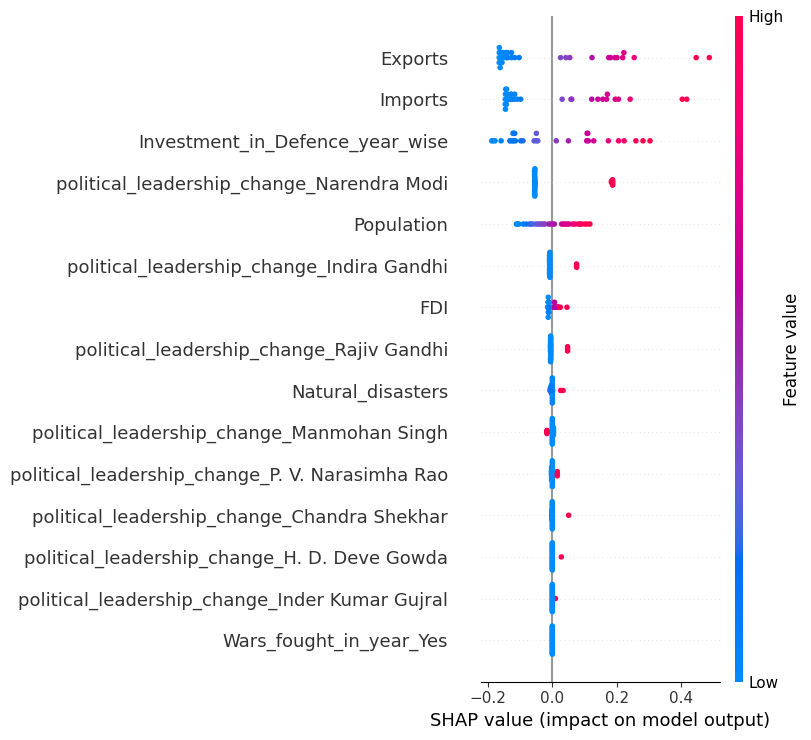

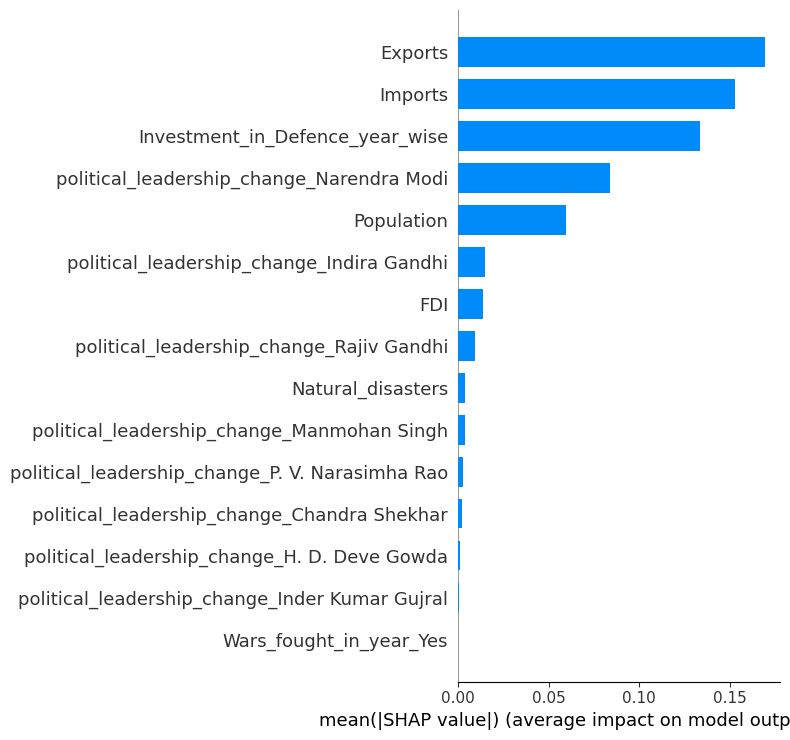

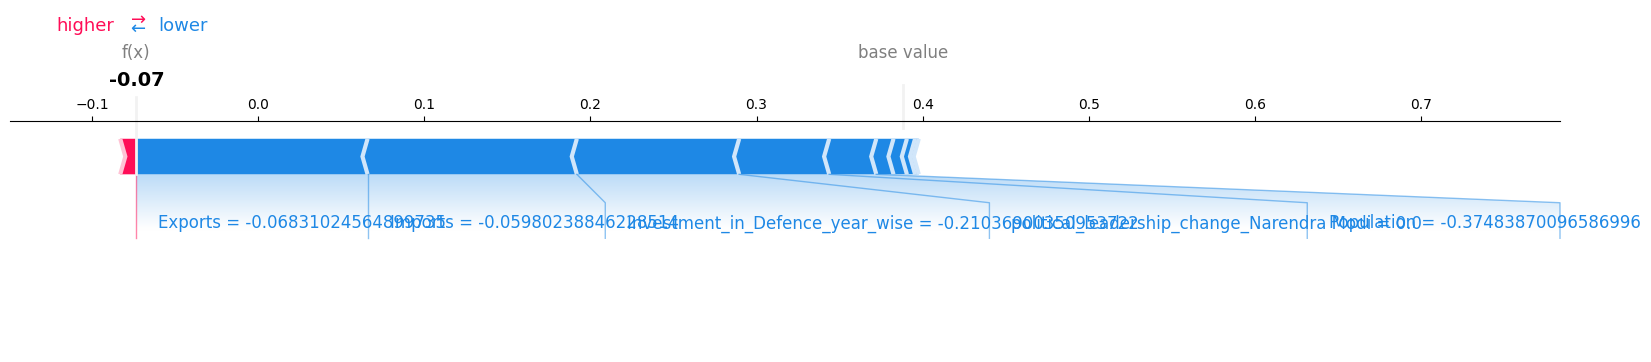

In [ ]:
import shap

# For best speed, sample a manageable number from training data for the explainer
sample_size = min(50, len(x_train))
X_sample = x_train.sample(sample_size, random_state=42)
# Create SHAP KernelExplainer for non-linear SVR
explainer = shap.KernelExplainer(svr_tuned_train.predict, X_sample)

# Calculate SHAP values for all or a sample of training data
shap_values = explainer.shap_values(x_train)

# SHAP summary plot: both magnitude and sign (positive or negative impact)
shap.summary_plot(shap_values, x_train, feature_names=feature_names)

shap.summary_plot(shap_values, x_train, feature_names=feature_names, plot_type='bar')

i = 0   # Index of the instance you want to explain
shap.force_plot(
    explainer.expected_value,
    shap_values[i,:],
    x_train.iloc[i,:],
    feature_names=feature_names,
    matplotlib=True
)

### Testing Dataset

  0%|          | 0/14 [00:00<?, ?it/s]

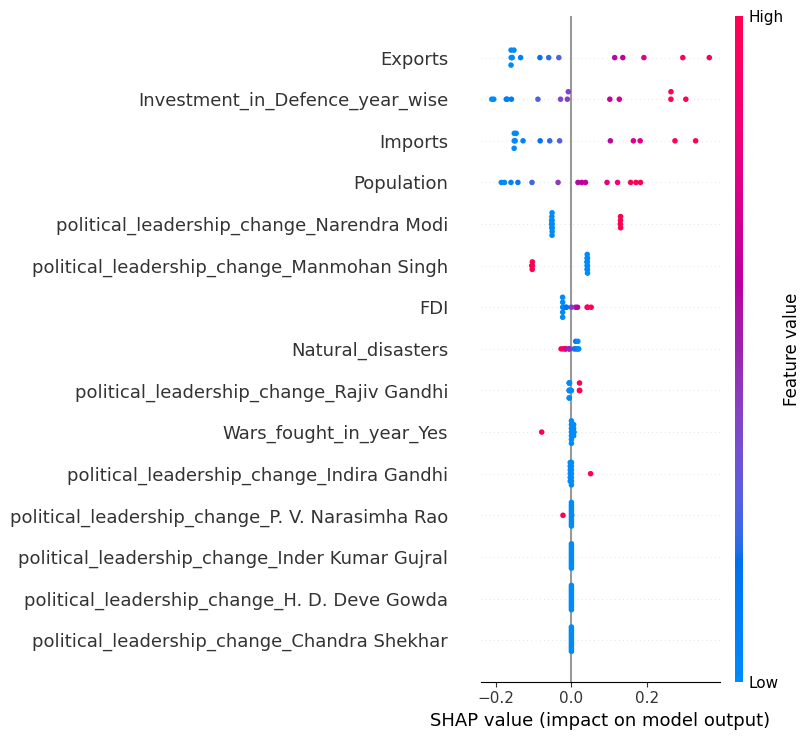

In [ ]:
sample_size_1 = min(50, len(x_test))
X_sample_1 = x_test.sample(sample_size_1, random_state=42)

# Determine sample size based on data size
sample_size_1 = min(50, len(x_test))

# Sample from x_test
X_sample_1 = x_test.sample(sample_size_1, random_state=42)

# Create SHAP KernelExplainer
explainer = shap.KernelExplainer(svr_tuned_test.predict, X_sample_1)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=feature_names)
